In [368]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anemia-dataset/anemia.csv


<div style="background-color:#FDBD55; padding:0.7em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h1 style="text-align:center; color:black">🙋🏻‍♂️Welcome🐯</h1>
</div>

In this notebook we are going to explore this simple dataset and create a predictive model to recognize anemia from this data.

In particular, we will focus on creating curated and aesthetic <u>visualizations</u> that allow us to find the best patterns for prediction.

If this notebook will be to your liking, I kindly ask you to leave an **upvote**⬆️. It would help me a lot and I would really appreciate it.❤️

# Table of contents

### 1. [Importing Data 📥](#importing)

### 2. [Data visualization & EDA 📈](#eda)
    
**[Definitions of functions ⌨️](#functions)**
    
**[Numeric Variables Distribution 🔢](#numeric)**
    
**[Categorical Variables Distibution 📊](#categorical)**
    
**[Correlation with "Results"🔍](#correlation)**
    
### 3. [Models and predictions🤖](#modelling)

**[Searching for the model💻](#model-search)**
    
**[Importance of features🧐](#features-importance)**
    
**[Features Selection⬇️](#features-selection)**

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h2 style="text-align:left; color:#342E37">About Dataset</h2>
</div>

---

<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Gender</mark> : 0 - male, 1 - female

---

<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Hemoglobin</mark>: Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCH</mark>: MCH is short for "mean corpuscular hemoglobin." It's the average amount in each of your red blood cells of a protein called hemoglobin, which carries oxygen around your body.

---
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCHC</mark>: MCHC stands for mean corpuscular hemoglobin concentration. It's a measure of the average concentration of hemoglobin inside a single red blood cell.

--- 
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">MCV</mark>: MCV stands for mean corpuscular volume. An MCV blood test measures the average size of your red blood cells.

--- 
<mark style="background-color:#FEDEAA; padding:4px; border-radius:5px">Results</mark>: 0- not anemic, 1-anemic

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="importing"><h2 style="text-align:left; color:#342E37">Importing Data & Libraries 📥</h2></a>
</div>


In [369]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
# Data import
df = pd.read_csv("/kaggle/input/anemia-dataset/anemia.csv")

print(f"Shape of dataset -> {df.shape}")
print(df.info())

df.head()

Shape of dataset -> (1421, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0

Our dataset contains over 1400 instances, and 6 features. Obviously, the variable of greatest interest is *Results*, which indicates the presence or absence of anemia in the patient. It will be the focus of the notebook and will be the target of our predictions.

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="eda"><h2 style="text-align:left; color:#342E37">Data visualization & EDA 📈</h2></a>
</div>


<a id="functions"><b style="font-size:1.2em">Definitions of functions ⌨️</b><a>

In [371]:
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

I define a list with colors that will be present in all notebook views so that they are consistent.

In [372]:
# orange, dark blue, light blue 
colors = ["#fca311", "#14213d", "#00b4d8"]

<div>
<div style="float:left; width:33.3%; background-color:#fca311; height:50px; border-radius:0.5em 0 0 0.5em"></div>
<div style="float:left; width:33.3%; background-color:#14213d; height:50px"></div>
<div style="float:right; width:33.3%; background-color:#00b4d8; height:50px; border-radius:0 0.5em 0.5em 0"></div>
</div>

I now define functions to display the distribution of variables and to compare them by categories. 

In [373]:
def hist(df, x, ax, hue=None, palette=None, main_color=colors[0], second_color=colors[1]):
    
    alpha = 0.8
    if hue:
        alpha = 0.3
    
    sns.histplot(data=df, x=x, ax=ax,
                 hue=hue, palette=palette, 
                 color=main_color, linewidth=3, bins=20, alpha=alpha,
                 kde=True, line_kws={"linewidth":3, "linestyle":"--"}
                )
    ax.lines[0].set_color(second_color)
    
    ax.set_ylabel("Number of observation")
    ax.set_xlabel(x, fontsize="x-large")
    
    set_style(ax)
    

**CDF** graphs allow us to easily compare multiple distributions and are precisely great for comparisons

In [374]:
def cdf_plot(df, x, ax, hue=None, palette=None, main_color=colors[1]):
    
    sns.kdeplot(data=df, x=x, hue=hue, ax=ax, color=main_color,
                palette=palette,
                cumulative=True, warn_singular=False, linewidth=4, common_norm=False)
    
    set_style(ax)

In [375]:
def count(df, x, ax, main_color=colors[0], hue=None, palette=None):
    
    sns.countplot(data=df, x=x, ax=ax, 
                  color=main_color, saturation=0.8, linewidth=3, edgecolor="black",
                  hue=hue, palette=palette)
    
    for container in ax.containers:
        ax.bar_label(container, color="black", fontsize=20)
    
    ax.set_ylabel("")
    ax.set_xlabel(x, fontsize=15)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    
    
    set_style(ax)

<a id="numeric"><b style="font-size:1.2em">Numeric Variables Distribution 🔢</b><a>

In [376]:
numeric_cols = [col for col in df.columns if df[col].dtype == float]

fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    
    hist(df, col, ax)
    
fig.suptitle("Distribution of numeric variables", fontsize="xx-large")

plt.show()

Among the numerical columns we can see that:

1. "**Hemoglobin**" has a distribution of the right-skewed type. A modicum of knowledge regarding anemia tells us that it is a typical characteristic of sufferers to have low hemoglobin, so this distribution is not surprising.


2. All other columns have a uniform distribution. We will go on later to see if the categories show differences in these features.

<a id="categorical"><b style="font-size:1.2em">Categorical Variables Distribution 📊</b><a>

In [377]:
cat_cols = [col for col in df.columns if df[col].dtype == int]

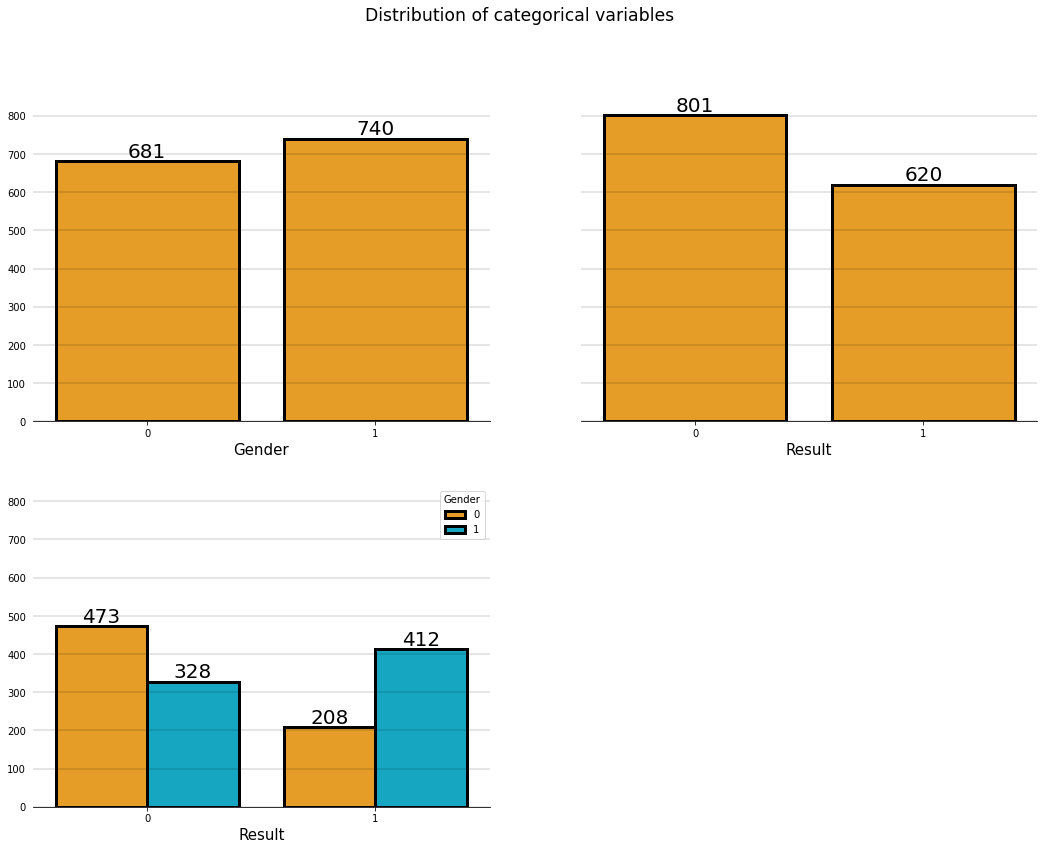

In [378]:
fig, axs = plt.subplots(2, 2, figsize=(18, 13), sharey=True)

for i, col in enumerate(cat_cols):
    count(df, col, axs[0][i])
    
count(df, "Result", axs[1][0], hue="Gender",palette=[colors[0], colors[2]])

fig.delaxes(axs[1,1])
fig.suptitle("Distribution of categorical variables", fontsize="xx-large")

plt.show()

Categorical variables are well distributed in the dataset, without excessive imbalance.

<a id="correlation"><b style="font-size:1.2em">Correlation with "Results"🔍</b><a>

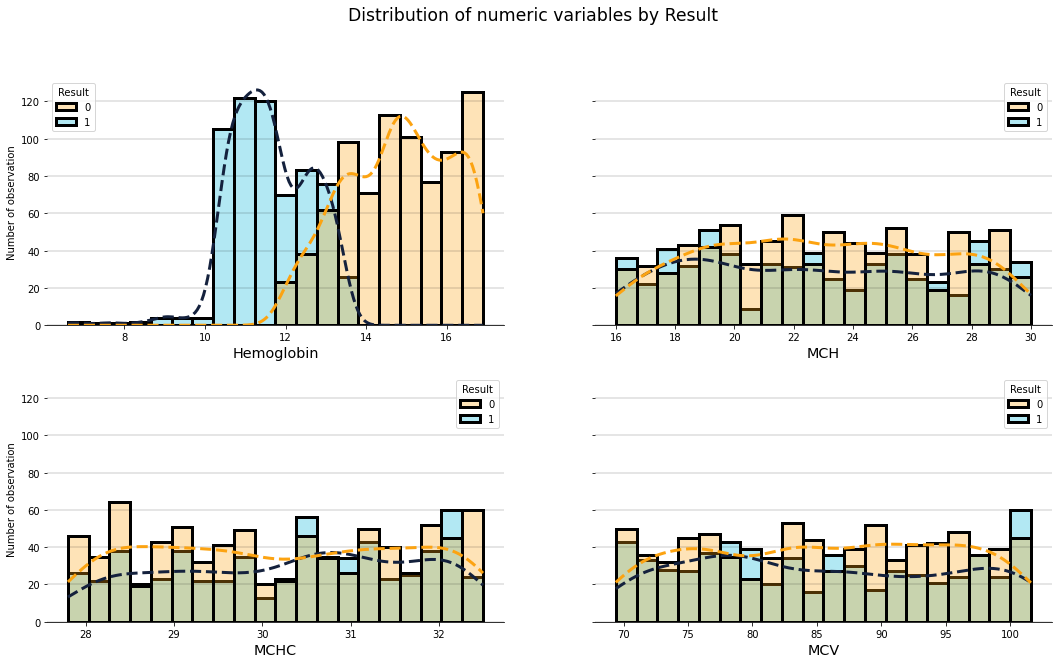

In [379]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    
    hist(df, col, ax, hue="Result", palette=[colors[0], colors[2]])
    
fig.suptitle("Distribution of numeric variables by Result", fontsize="xx-large")

plt.show()

We can see that there is a marked difference in hemoglobin values for patients with anemia compared with those without it. The other variables show no difference for these categories. 

We confirm this comparison by means of a graph from the CDF

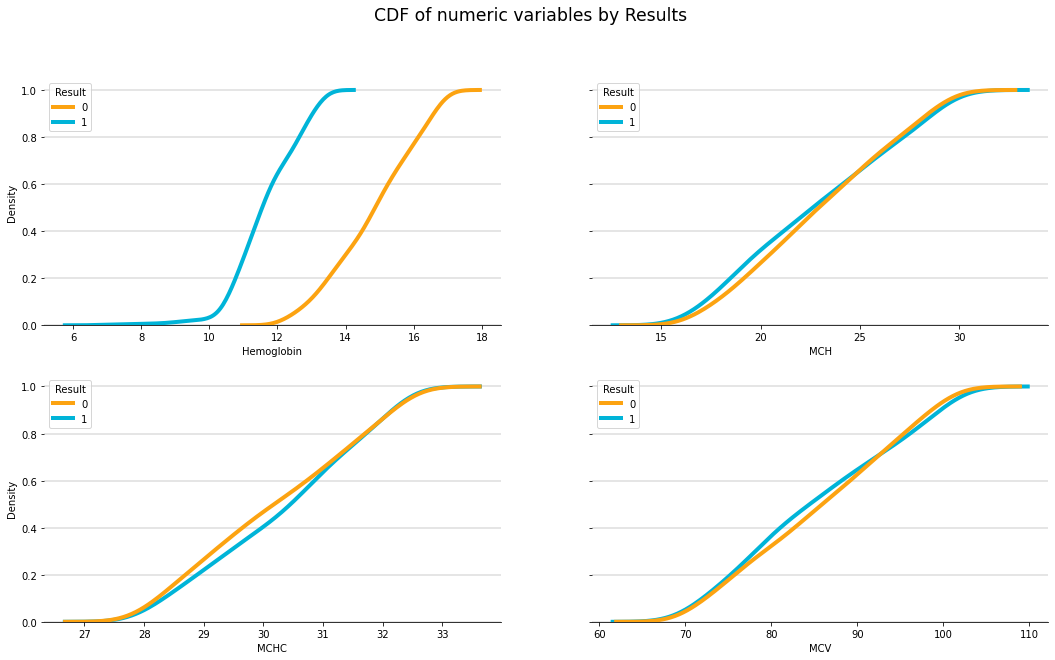

In [380]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    
    cdf_plot(df, col, ax, hue="Result", palette=[colors[0], colors[2]])

fig.suptitle("CDF of numeric variables by Results", fontsize="xx-large")
    
plt.show()

And are there strong differences for gender?

Let us compare these categories with another cdf

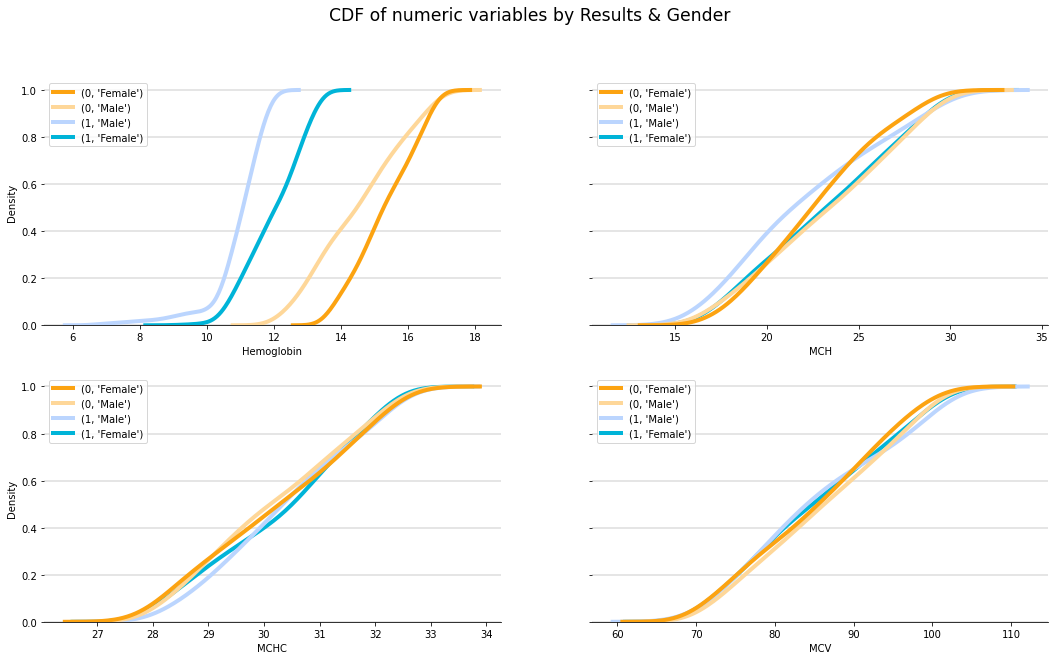

In [381]:
df["Gender_str"] = df["Gender"].map({
    0: "Male",
    1: "Female"
})

fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    
    cdf_plot(df, col, ax, hue=df[['Result', 'Gender_str']].apply(tuple, axis=1), 
             palette=[colors[0], "#FED799", "#BBD5FE", colors[2]])
    
fig.suptitle("CDF of numeric variables by Results & Gender", fontsize="xx-large")
    
plt.show()

df.drop("Gender_str", axis=1, inplace=True)

Men tend to have lower hemoglobin values, both healthy and with anemia. This will help in our model to make more accurate predictions.

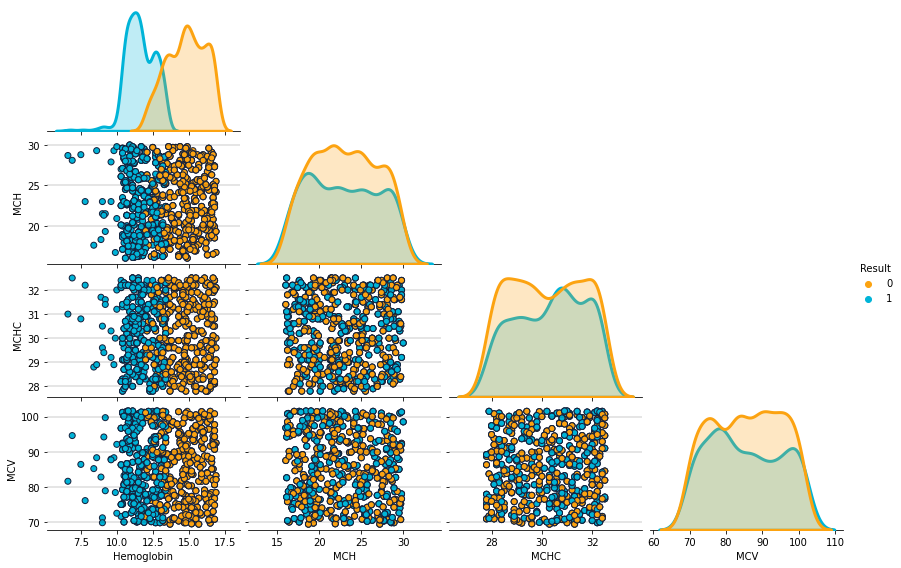

In [382]:
g = sns.pairplot(data=df.drop("Gender", axis=1), hue="Result", palette=[colors[0], colors[2]], 
             corner=True, plot_kws={"linewidth":1, "edgecolor":colors[1]},
             diag_kws={"linewidth":3},
             height=2, aspect=1.5)
for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)

fig.suptitle("Correlation between numeric variables by Results", fontsize="xx-large")
            
plt.show()

Such a pairplot shows that there is no kind of relationship between "Result" and numerical variables other than "Hemoglobin." 

<div style="background-color:#FEDEAA; padding-left:1em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <a id="modelling"><h2 style="text-align:left; color:#342E37">Models and Predictions 🔮</h2></a>
</div>


In [383]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [384]:
X = df.drop("Result", axis=1)
y = df["Result"]

SEED = 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [385]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

<a id="model-search"><b style="font-size:1.2em">Searching for the model 💻</b><a>

In [386]:
models = {
    "LogisticRegression": LogisticRegression(random_state=SEED),
    "Knn": KNeighborsClassifier(),
    "S.V.C.": SVC(random_state=SEED),
    "RandomForestClassifier": RandomForestClassifier(random_state=SEED)
}

In [387]:
for name in models.keys():
    model = models[name]
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_test = roc_auc_score(y_test, y_pred_test)
        
    print("--"*10, f" {name} ", "--"*10)
    print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
    print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  LogisticRegression  --------------------

Accuracy score: 	Train: 0.99 	Test: 0.99

AUC score: 		Train: 0.99 	Test: 0.99

--------------------  Knn  --------------------

Accuracy score: 	Train: 0.94 	Test: 0.89

AUC score: 		Train: 0.94 	Test: 0.89

--------------------  S.V.C.  --------------------

Accuracy score: 	Train: 0.91 	Test: 0.9

AUC score: 		Train: 0.91 	Test: 0.9

--------------------  RandomForestClassifier  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



Wow! With a random forest, without any kind of hyperparameter optimization, we scored maximum accuracy! This highlights the high quality of the data.

<a id="features-importance"><b style="font-size:1.2em">Importance of features🧐</b><a>

Let's go on to see, for the model that scored best, what are and in what proportion are the most important variables for prediction. 

In [388]:
model = RandomForestClassifier(random_state=SEED)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [389]:
feature_importance = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False) * 100

feature_importance = feature_importance.round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y=feature_importance.index, x=feature_importance.values, ax=ax, color=colors[2], linewidth=3, edgecolor="black")
ax.bar_label(ax.containers[0], color="black", fontsize=15, padding=5, fmt='%g%%')

set_style(ax, left=False, bottom=True, axis_grid="x")

ax.set_title("Feature Importance: Random Forest Classifier", fontsize="xx-large")
ax.set_xlim([0, 100])

plt.show()

As was easy to predict, the feature "*Hemoglobin*" plays the key role for the model. It is followed, with significantly less importance, by "*Gender*", and the other values assume minimal importance.

<a id="features-selection"><b style="font-size:1.2em">Features Selection⬇️</b><a>

In the EDA, we noticed how the variables "MCV," "MCH," and "MCHC" had no correlation with our target. Let us try to see how the predictive model behaves by performing feature selection.

In [390]:
reduced_df = df.drop(["MCV", "MCH", "MCHC"], axis=1)

X_new = reduced_df.drop("Result", axis=1)
y_new = reduced_df["Result"]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_new, y_new, test_size=0.25, stratify=y_new, random_state=SEED)

In [391]:
red_model = RandomForestClassifier(random_state=SEED)

red_model.fit(X_train_red, y_train_red)

y_pred_train = red_model.predict(X_train_red)
y_pred_test = red_model.predict(X_test_red)

accuracy_train = accuracy_score(y_train_red, y_pred_train)
accuracy_test = accuracy_score(y_test_red, y_pred_test)

auc_train = roc_auc_score(y_train_red, y_pred_train)
auc_test = roc_auc_score(y_test_red, y_pred_test)

print("--"*10, f" Random Forest ", "--"*10)
print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  Random Forest  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



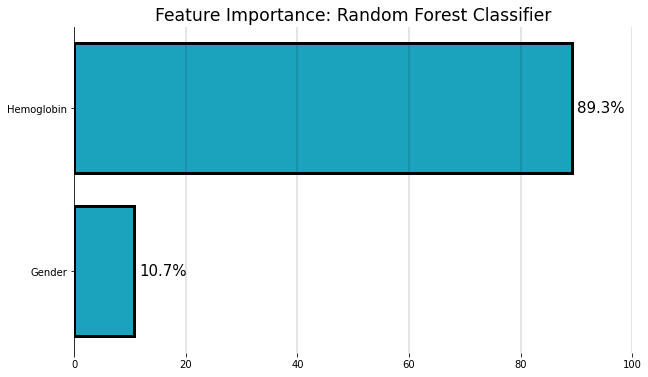

In [392]:
feature_importance = pd.Series(data=red_model.feature_importances_, index=X_new.columns).sort_values(ascending=False) * 100

feature_importance = feature_importance.round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y=feature_importance.index, x=feature_importance.values, ax=ax, color=colors[2], linewidth=3, edgecolor="black")
ax.bar_label(ax.containers[0], color="black", fontsize=15, padding=5, fmt='%g%%')

set_style(ax, left=False, bottom=True, axis_grid="x")

ax.set_title("Feature Importance: Random Forest Classifier", fontsize="xx-large")
ax.set_xlim([0, 100])

plt.show()

As we might have expected, the model again maintains its highest accuracy, even with only 2 features remaining.

<div style="background-color:#FDBD55; padding:0.7em; border:solid; border-width:0.3em; border-radius:0.5em; border-color:#342E37">
    <h1 style="text-align:center; color:black">Thank you for your attention and time❤️</h1>
    <h3 style="text-align:center; color:black">If you liked the notebook, please leave an upvote. You would support my work and I would greatly appreciate it.</h3>
    <h4 style="text-align:center; color:black">For any advice or comments please post in the appropriate section! I am just a student starting out in that field and would really appreciate advice or feedback on my work.</h4>
    <h2 style="text-align:center; color:black">Thanks again and happy coding💻🐯</h2>
</div>

In [399]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [394]:
pip install skl2onnx

Note: you may need to restart the kernel to use updated packages.


In [404]:
# # Convert into ONNX format
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

onx = convert_sklearn(model, initial_types=[('X', FloatTensorType([None, X_train.shape[1]]))])
with open("anemia.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [396]:
pip install mlprodict

Note: you may need to restart the kernel to use updated packages.


In [397]:
pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.


In [406]:
# Compute the prediction with ONNX Runtime
import onnxruntime as rt
sess = rt.InferenceSession("anemia.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

pred_onx_test = sess.run([label_name], {input_name: X_test.astype(numpy.float32)})[0]

In [407]:
pred_onx

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [408]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [411]:
pred_onx_test = sess.run([label_name], {input_name: X_test.astype(numpy.float32)})[0]
pred_onx_train = sess.run([label_name], {input_name: X_train.astype(numpy.float32)})[0]

In [412]:
pred_onx_test

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [410]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
    
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)
        
print("--"*10, f" {name} ", "--"*10)
print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  RandomForestClassifier  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



In [413]:
y_pred_train = pred_onx_train
y_pred_test = pred_onx_test
    
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)
        
print("--"*10, f" {name} ", "--"*10)
print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  RandomForestClassifier  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0

